In [10]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [11]:
class BatsmanState(TypedDict):
    runs : int
    balls : int
    fours : int
    sixes : int

    srate : float
    bboud: float
    boundper : float

    summary : str
    

In [12]:
def strikeRate(state:BatsmanState):
    strRate = (state['runs']/state['balls'])*100

    return {'srate': strRate}

In [13]:
def ballsboundry(state:BatsmanState):
    ballbound = (state['balls']/(state['fours'] + state['sixes']))

    return {'bboud':ballbound}

In [14]:
def boundryperc(state:BatsmanState):
    boundryper = (((state['fours']*4) + (state['sixes']*6))/state['runs'])*100

    return {'boundper': boundryper}

In [27]:
def summary(state:BatsmanState):
    summary = f"""
Strike Rate - {state['srate']}\n
Balls per Boundry - {state['bboud']} \n
Boundery percent - {state['boundper']}
"""

    return {'summary':summary}


In [28]:
## add nodes and edges:
graph = StateGraph(BatsmanState)

graph.add_node('strikeRate', strikeRate)
graph.add_node('ballsboundry', ballsboundry)
graph.add_node('boundryperc', boundryperc)
graph.add_node('summary', summary)


#Edges
graph.add_edge(START, 'strikeRate')
graph.add_edge(START, 'ballsboundry')
graph.add_edge(START, 'boundryperc')

graph.add_edge('strikeRate', 'summary')
graph.add_edge('ballsboundry', 'summary')
graph.add_edge('boundryperc', 'summary')

graph.add_edge('summary', END)

workflow = graph.compile()

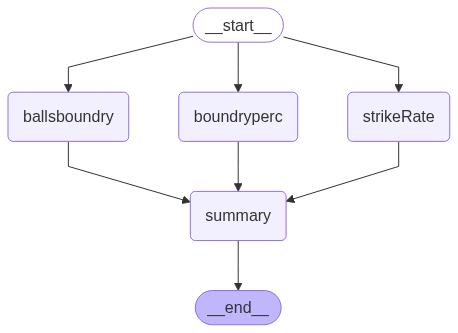

In [29]:
workflow

In [30]:
initial_state = {
    'runs':121,
    'balls':97,
    'fours':13,
    'sixes':5
}

workflow.invoke(initial_state)

{'runs': 121,
 'balls': 97,
 'fours': 13,
 'sixes': 5,
 'srate': 124.74226804123711,
 'bboud': 5.388888888888889,
 'boundper': 67.76859504132231,
 'summary': '\nStrike Rate - 124.74226804123711\n\nBalls per Boundry - 5.388888888888889 \n\nBoundery percent - 67.76859504132231\n'}